# Loading data and data cleaning

In [138]:
import os
import string
import nltk

text_data = {}
common_words_dict = {} # this will be used to count the number of common words in the processed data
result = {}
insignificant = string.punctuation+('1234567890•—')+('\n')
# cwd is a parameter
cwd = '/Users/datnguyen/Documents/GitHub/P1-final/Text data/'
files = os.listdir(cwd)

for filename in files:
    if filename == '.DS_Store':
        None
    elif filename == '3000 common English words.txt':
        file_dir = cwd + filename
        file = open(file_dir, 'rt')
        text = file.read()
        file.close()
        common_words = text.split("\n")
        # Generate a dictionary contains all words in common_words as key
        # with their values are all zero by default. 
        for word in common_words:
            common_words_dict[word] = 0
    else:
        file_dir = cwd + filename
        file = open(file_dir, 'rt')
        text = str(file.read()).lower()
        file.close()
        # Getting rid of insignificant components
        text = ''.join([i for i in text if i not in insignificant])
        text = text.split(' ')
        text = list(filter(lambda a: a != '', text))
        # Using nltk library to perform stemming on the text data for more better final result
        sno = nltk.stem.SnowballStemmer('english')
        value = [sno.stem(word) for word in text]
        # Store all processed data into the text_data dictionary
        text_data[filename[0:-4]] = value
        # We are now done with the data handling process

In [139]:
for text in text_data.keys():
    common_words_counter = common_words_dict.copy()
    for i in text_data[text]:
        index = 5
        if i in common_words:
            common_words_counter[i] += 1
        else:
            None
        
    result[text] = sum(common_words_counter.values())

In [140]:
result

{'stanfordcs231n': 109563,
 'deeplearningbook': 150282,
 'fastai': 95188,
 'introtodeeplearning': 59802,
 'sutton&bart': 130381,
 'ISLR': 96292}

In [167]:
for key in result.keys():
    result[key] = (result[key]/len(text_data[key]))*100

indexes = len(result.keys())
text = []
percentage_of_common_words = []
for each in result:
    text.append(each)
    percentage_of_common_words.append(result[each])

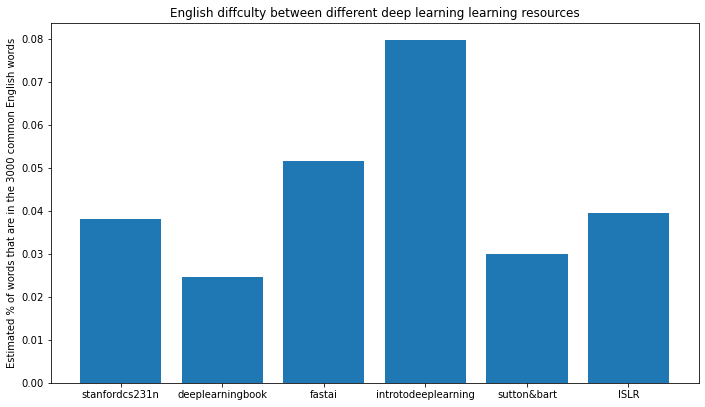

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(text,percentage_of_common_words)
ax.set_ylabel('Estimated % of words that are in the 3000 common English words')
ax.set_title('English diffculty between different deep learning learning resources')
plt.show()